In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read file
data_values=pd.read_csv('TrainingValues.csv')
data_labels=pd.read_csv('TrainingLabels.csv')
data = data_values.merge(data_labels, on='id')
data = data.set_index('id').sort_index()
data

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,Lake Tanganyika,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,Rufiji,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,Wami / Ruvu,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,Wami / Ruvu,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74240,0.0,2013-03-22,World Vision,1183,World vision,37.007726,-3.280868,Upendo Primary School,0,Pangani,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
74242,0.0,2011-04-12,Danida,0,DANIDA,33.724987,-8.940758,Kwa Mvulula,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
74243,0.0,2012-11-13,Ministry Of Water,1188,Hesawa,33.963539,-1.429477,Kwa Wambura Msege,0,Lake Victoria,...,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional


In [3]:
for col in data:
    print(col , data[col].sort_values().unique(), "\n")

amount_tsh [0.00e+00 2.00e-01 2.50e-01 1.00e+00 2.00e+00 5.00e+00 6.00e+00 7.00e+00
 9.00e+00 1.00e+01 1.20e+01 1.50e+01 2.00e+01 2.50e+01 2.60e+01 3.00e+01
 3.30e+01 3.50e+01 4.00e+01 5.00e+01 5.30e+01 5.90e+01 6.00e+01 7.00e+01
 1.00e+02 1.50e+02 2.00e+02 2.20e+02 2.50e+02 3.00e+02 3.06e+02 3.50e+02
 4.00e+02 4.50e+02 5.00e+02 5.20e+02 5.50e+02 5.90e+02 6.00e+02 7.00e+02
 7.50e+02 8.00e+02 9.00e+02 1.00e+03 1.20e+03 1.30e+03 1.40e+03 1.50e+03
 2.00e+03 2.20e+03 2.40e+03 2.50e+03 2.80e+03 3.00e+03 3.50e+03 3.60e+03
 4.00e+03 4.50e+03 4.70e+03 5.00e+03 5.40e+03 5.50e+03 6.00e+03 6.30e+03
 6.50e+03 7.00e+03 7.20e+03 7.50e+03 8.00e+03 8.50e+03 9.00e+03 1.00e+04
 1.10e+04 1.20e+04 1.30e+04 1.40e+04 1.50e+04 1.60e+04 1.63e+04 1.80e+04
 2.00e+04 2.50e+04 2.60e+04 3.00e+04 3.80e+04 4.00e+04 4.50e+04 5.00e+04
 6.00e+04 7.00e+04 1.00e+05 1.17e+05 1.20e+05 1.38e+05 1.70e+05 2.00e+05
 2.50e+05 3.50e+05] 

date_recorded ['2002-10-14' '2004-01-07' '2004-03-01' '2004-03-06' '2004-04-01'
 '2004-04-0

recorded_by ['GeoData Consultants Ltd'] 

scheme_management ['Company' 'None' 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust'
 'VWC' 'WUA' 'WUG' 'Water Board' 'Water authority' nan] 

scheme_name ['14 Kambarage' 'A' 'ADP' ... 'water supply in Mwanza'
 'water supply in katungulu' nan] 

permit [False True nan] 

construction_year [   0 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013] 

extraction_type ['afridev' 'cemo' 'climax' 'gravity' 'india mark ii' 'india mark iii'
 'ksb' 'mono' 'nira/tanira' 'other' 'other - mkulima/shinyanga'
 'other - play pump' 'other - rope pump' 'other - swn 81' 'submersible'
 'swn 80' 'walimi' 'windmill'] 

extraction_type_group ['afridev' 'gravity' 'india mark ii' 'india mark iii' 'mono' 'nira/tanira'
 'other' 'other handpump' 'ot

In [4]:
for col in data:
    if(0 in data[col].tolist()):
        print(col , " 0 : TRUE", len(data[data[col] == 0]));
        print(col , " NONE : TRUE", len(data[data[col].isnull()]));
        print("\n")

amount_tsh  0 : TRUE 41639
amount_tsh  NONE : TRUE 0


gps_height  0 : TRUE 20438
gps_height  NONE : TRUE 0


longitude  0 : TRUE 1812
longitude  NONE : TRUE 0


num_private  0 : TRUE 58643
num_private  NONE : TRUE 0


district_code  0 : TRUE 23
district_code  NONE : TRUE 0


population  0 : TRUE 21381
population  NONE : TRUE 0


public_meeting  0 : TRUE 5055
public_meeting  NONE : TRUE 3334


permit  0 : TRUE 17492
permit  NONE : TRUE 3056


construction_year  0 : TRUE 20709
construction_year  NONE : TRUE 0




In [5]:
# Index by id
# print(data.isnull().sum())
# print(data.population.unique())
data.population.min()
data['gps_height'].replace(0, np.nan, inplace=True)
data['population'].replace(0, np.nan, inplace=True)
# print(data.amount_tsh.unique())
data['amount_tsh'].replace(0, np.nan, inplace=True)
# print(data.amount_tsh.unique())
data.isnull().sum()

amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [6]:
# Fill na Prof got these code after visualising the data. 
data['longitude'].replace(0, np.nan, inplace=True)
data['latitude'].replace(0, np.nan, inplace=True)
data['construction_year'].replace(0, np.nan, inplace=True)

print(data.isnull().sum())
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)
print("\n" , data.isnull().sum())

amount_tsh               41639
date_recorded                0
funder                    3635
gps_height               20438
installer                 3655
longitude                 1812
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [7]:
data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)
print(data.isnull().sum())

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [8]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])
data[features].head(20)

,amount_tsh,gps_height,population
id,,,
0,0.014274,8.024794,0.130496
1,0.028560,14.461538,0.012459
2,0.014274,8.024794,0.130496
3,0.000560,12.090909,0.015738
4,0.014274,8.024794,0.130496
5,0.002846,0.825175,4.538509
6,0.028560,10.076795,0.327224
7,0.014274,8.024794,0.130496
8,0.014274,8.024794,0.130496


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

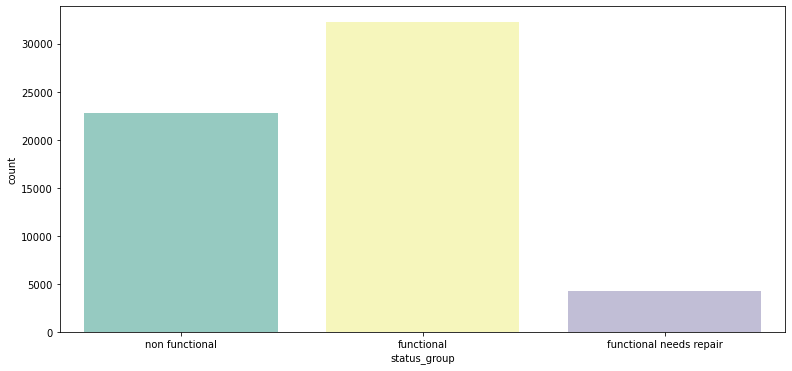

In [9]:

plt.figure(figsize=(13,6))
sns.countplot(data.status_group, palette = 'Set3')
data.status_group.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

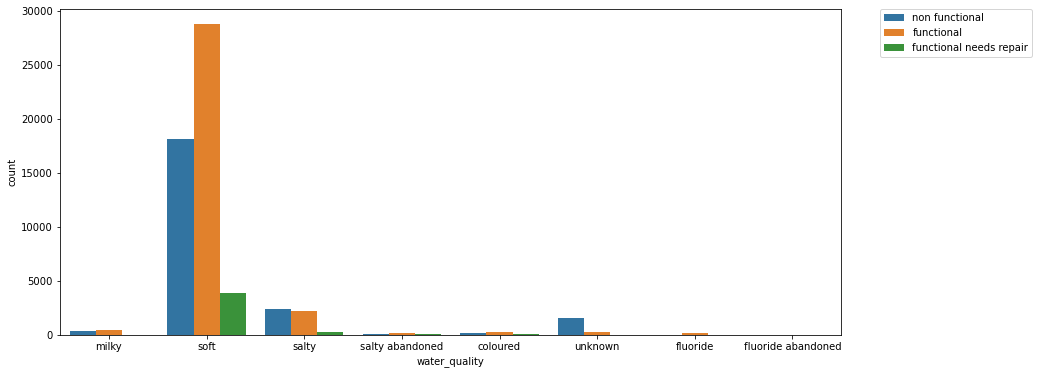

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

[2002.  2008.  1998.  1999.  2005.  2003.  2000.  2007.  2010.  1995.
 1984.  2012.  1981.  1977.  1976.  1975.  2004.  1982.  1980.  1992.
 2009.  1969.  1996.  1978.  1991.  2001.  1985.  2006.  1988.  1997.
 1994.  1972.  2011.  1989.  1973.  1983.  1990.  1993.  1974.  1987.
 1986.  1979.  1960.  1964.  1970.  2013.  1965.  1968.  1963.  1971.
 1967.  1961.  2001.5 1962.  1966.  1994.5]
59400


/Users/kengthong/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


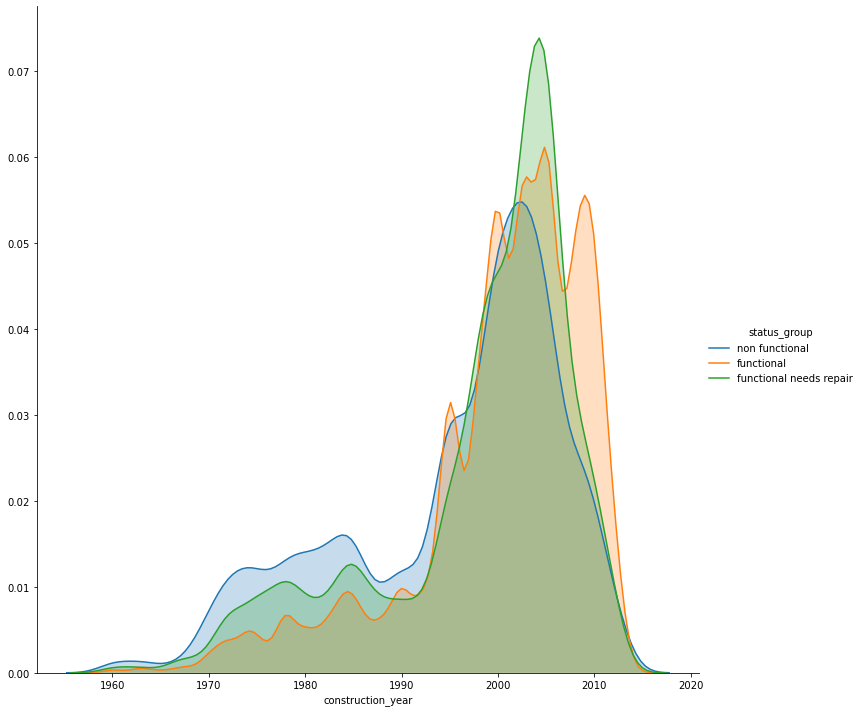

In [11]:
# Test models and 
print(data.construction_year.unique())
print(len(data.construction_year == 0))
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'construction_year', shade=True)
 .add_legend()
)

In [12]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(data.date_recorded.head(5))
print(data.construction_year.head(5))

id
0    2012-11-13
1    2011-03-05
2    2011-03-27
3    2013-06-03
4    2011-03-22
Name: date_recorded, dtype: object
id
0    2002.0
1    2008.0
2    1998.0
3    1999.0
4    1998.0
Name: construction_year, dtype: float64


In [13]:
data.isnull().sum()
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data.date_recorded.head(5)
print(data.date_recorded.dt.year.head(5))
print(data.construction_year.head(5))
data['operational_year'] = data.date_recorded.dt.year - data.construction_year
data.operational_year.head(5)

id
0    2012
1    2011
2    2011
3    2013
4    2011
Name: date_recorded, dtype: int64
id
0    2002.0
1    2008.0
2    1998.0
3    1999.0
4    1998.0
Name: construction_year, dtype: float64


id
0    10.0
1     3.0
2    13.0
3    14.0
4    13.0
Name: operational_year, dtype: float64

/Users/kengthong/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


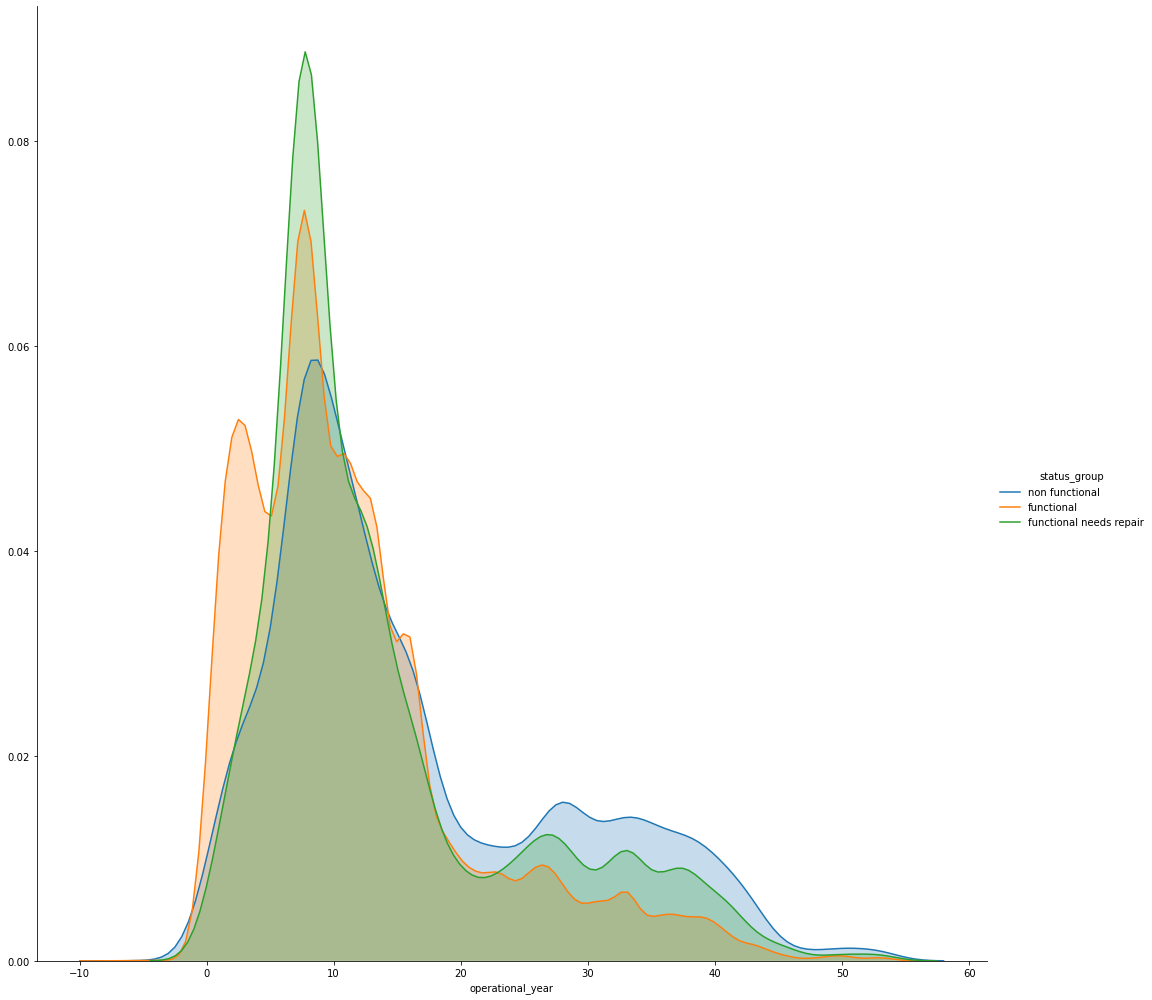

In [14]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=14)
  .map(sns.kdeplot, 'operational_year', shade=True)
 .add_legend()
)

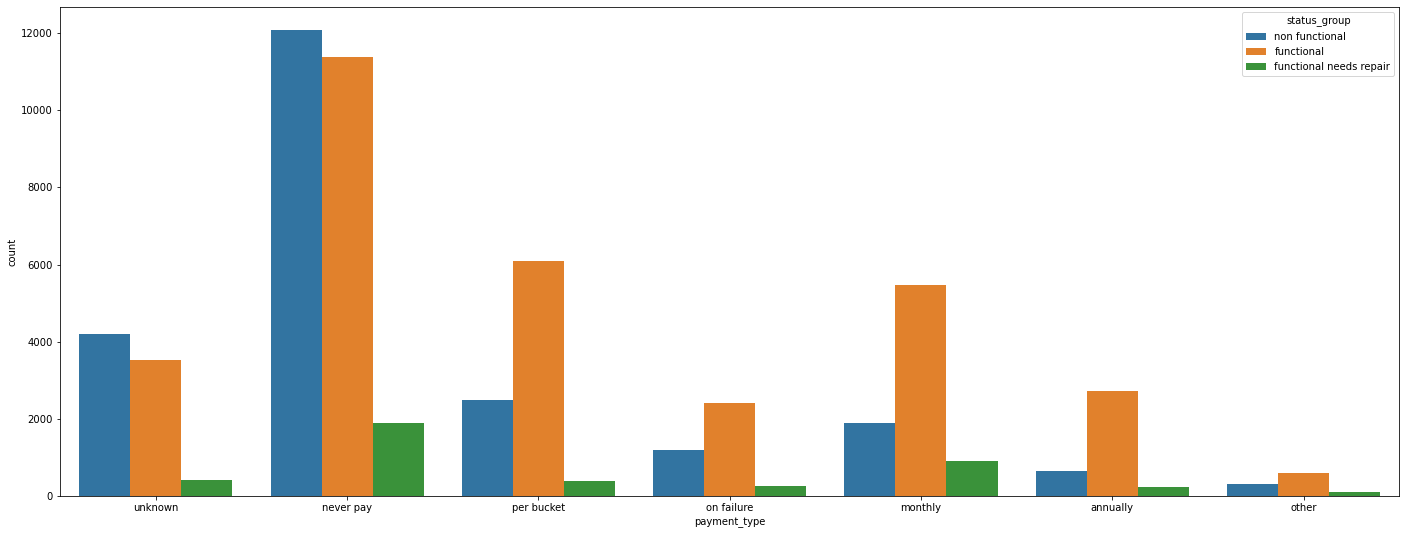

In [15]:
plt.figure(figsize=(24, 9))
sns.countplot(data=data,x='payment_type',hue='status_group')

In [16]:
#DATA Cleaning
waste_features=['wpt_name','num_private','subvillage','region_code','recorded_by']
#since region and region_code are representing the same thing
data.drop(waste_features,axis=1,inplace=True)
print(data.groupby(['management', 'management_group']).size() )
data.drop('management_group',axis=1,inplace=True)

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64


In [17]:
# Blind copying from here on

In [18]:
data.drop('extraction_type_group',axis=1,inplace=True)
data.drop('extraction_type_class',axis=1,inplace=True)
data.groupby(['scheme_management', 'scheme_name']).size()

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 60
                   Bagamoyo wate                210
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    Yongoma                       16
                   Zepalama                       5
                   no scheme                      9
                   pump                           2
                   water supply at Kalebejo       1
Length: 3077, dtype: int64

In [19]:

data.drop('scheme_name',axis=1,inplace=True)

In [20]:
data.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [21]:
data.drop('payment',axis=1,inplace=True)

In [22]:
data.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [23]:
data.drop('quality_group',axis=1,inplace=True)

In [24]:
data.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [25]:
data.drop('quantity_group',axis=1,inplace=True)

In [26]:
data.groupby(['source', 'source_type', 'source_class']).size()

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [27]:
data.drop('source_type',axis=1,inplace=True)

In [28]:
data.drop('source_class',axis=1,inplace=True)


In [29]:
data.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [30]:
data.drop('waterpoint_type_group',axis=1,inplace=True)


In [31]:
print(data.groupby(['lga', 'ward','status_group']).size() )


lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64


In [32]:
data.drop('ward',axis=1,inplace=True)


In [33]:
data.groupby(['installer', 'funder','status_group']).size()


installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [34]:
# data.drop('installer',axis=1,inplace=True)


In [35]:
data.isnull().sum()


amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
public_meeting       3334
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
operational_year        0
dtype: int64

In [36]:
data.drop('public_meeting', axis=1, inplace=True)
data.drop('permit', axis=1, inplace=True)

In [37]:
data.isnull().sum()

amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
basin                   0
region                  0
district_code           0
lga                     0
population              0
scheme_management    3877
construction_year       0
extraction_type         0
management              0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
operational_year        0
dtype: int64

In [38]:
data.waterpoint_type = data.waterpoint_type.str.lower()
data.funder = data.funder.str.lower()
data.basin = data.basin.str.lower()
data.region = data.region.str.lower()
data.source = data.source.str.lower()
data.lga = data.lga.str.lower()
data.management = data.management.str.lower()
data.quantity = data.quantity.str.lower()
data.water_quality = data.water_quality.str.lower()
data.payment_type=data.payment_type.str.lower()
data.extraction_type=data.extraction_type.str.lower()

In [40]:
data["funder"].fillna("other", inplace=True)
data["scheme_management"].fillna("other", inplace=True)
data["installer"].fillna("other", inplace=True)
print(data.isnull().sum())
data.drop('date_recorded', axis=1, inplace=True)
data.drop('construction_year', axis=1, inplace=True)
data.info()
data.quantity.head(5)
pd.DataFrame(data).to_csv("clean.csv")

amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region               0
district_code        0
lga                  0
population           0
scheme_management    0
extraction_type      0
management           0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
operational_year     0
dtype: int64


KeyError: "['date_recorded'] not found in axis"

In [50]:
# cleaning data for pytorch nn model
from sklearn.preprocessing import LabelEncoder

print(data.head())

df = data.copy()
for col in df.columns:
    print(df.dtypes[col])
#     if data.dtypes[col] == "object":
#         data[col] = data[col].fillna("NA")
#     else:
#         data[col] = data[col].fillna(0)
    df[col] = LabelEncoder().fit_transform(df[col])

cols_at_end = ['status_group']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
print(df.head())
pd.DataFrame(df).to_csv("clean-pt.csv")
print(df.columns)

    amount_tsh           funder  gps_height installer  longitude  latitude  \
id                                                                           
0     0.014274            tasaf    8.024794     TASAF  33.125828 -5.118154   
1     0.028560            shipo   14.461538     SHIPO  34.770717 -9.395642   
2     0.014274             lvia    8.024794      LVIA  36.115056 -6.279268   
3     0.000560  germany republi   12.090909       CES  37.147432 -3.187555   
4     0.014274             cmsr    8.024794      CMSR  36.164893 -6.099289   

              basin       region  district_code       lga  ...  \
id                                                         ...   
0   lake tanganyika       tabora              3      uyui  ...   
1            rufiji       iringa              4    njombe  ...   
2       wami / ruvu       dodoma              4  chamwino  ...   
3           pangani  kilimanjaro              5       hai  ...   
4       wami / ruvu       dodoma              4  chamwino